# The basics

### Create a vector and matrix of random numbers

In [1]:
# Widely used package to perform scientific computing
import numpy as np
# Fix random seed for reproduction
np.random.seed(1)
# Generate a list of random numbers as one-dimensional array
x = np.random.rand(5)
x

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01])

In [2]:
# Generate a list of random numbers as two-dimensional array
X = np.random.rand(2,3)
X

array([[0.09233859, 0.18626021, 0.34556073],
       [0.39676747, 0.53881673, 0.41919451]])

### Observing sampling variability from different distributions

In [3]:
# Draw random samples from a uniform distribution ranging from -1 to 0
x = np.random.uniform(-1,0,5)
x

array([-0.3147805 , -0.79554775, -0.12188256, -0.97261241, -0.32953249])

In [4]:
# Drawing again will most likely result in a different set of numbers
x = np.random.uniform(-1,0,5)
x

array([-0.5826952 , -0.44131017, -0.85961306, -0.80189851, -0.19925543])

In [5]:
# Change to a normal distribution with mean 1 and variance 2
x = np.random.normal(1,2,5)
x

array([2.45995119, 1.74598758, 2.06762182, 0.8160534 , 4.82764078])

# Data

In [6]:
# Train-test split
import random
# Reshape to a column representation, -1 means the number of rows is inferred
X = np.array(range(10)).reshape(-1,1)
y = np.array([1.5, 2.5, 3.7, 3.8, 5.1, 5.8, 6.2, 5.6, 5.2, 5.3]).reshape(-1,1)

In [7]:
# Define the split ratio for the training set
train_ratio = 0.8
# Randomly sample a list of integer indexes to go into the training set
train_idx = random.sample(range(len(X)), int(train_ratio*len(X)))
# Allocate training and test set based on selected training indexes
X_train = X[train_idx]
y_train = y[train_idx]
# Allocate training and test set based on indexes not in training set
X_test = X[[idx for idx in range(len(X)) if not idx in train_idx]]
y_test = y[[idx for idx in range(len(X)) if not idx in train_idx]]

Text(0, 0.5, 'y')

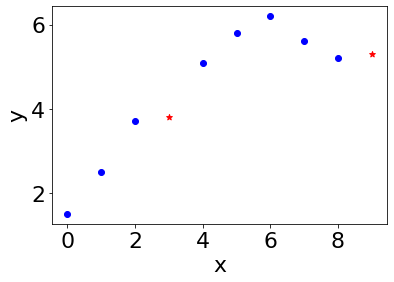

In [8]:
# import supporting libraries
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.scatter(X_train, y_train, c='blue')
plt.scatter(X_test, y_test, c='red', marker="*")
plt.xlabel("x")
plt.ylabel("y")

## Model
### Implement the prediction function

In [9]:
# create the new design matrix with the column vector of 1s included 
# at the beginning
X_new = np.hstack((np.ones_like(X), X))
# X_new

In [10]:
# randomly initialize the value of the weight vector including the bias term
w = np.random.normal(0, 1, (X_new.shape[1], 1))
w_original = w.copy()
w

array([[0.33079713],
       [1.14194252]])

In [11]:
# generate model prediction via matrix vector multiplication using the @ sign
f = X_new@w
# f

In [12]:
# create a list of inputs on the x axis for visualization
# explicitly specify the column dimension using np.newaxis
X_vals = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
X_vals_new = np.hstack((np.ones_like(X_vals), X_vals))
# generate the list of predictions
y_vals = X_vals_new@w

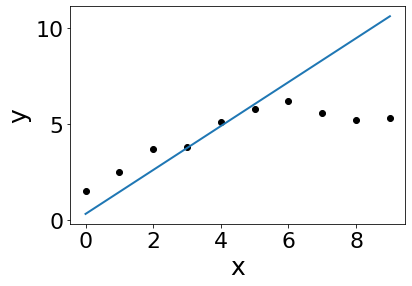

In [13]:
# plot the model
fig, ax = plt.subplots()
ax.scatter(X, y, c='black')
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.plot(X_vals, y_vals, linewidth=2)
plt.show()

## Cost function

In [14]:
# calculate the residuals
resid = y - f
# get the total cost as a dot product of the residuals
Q = np.dot(resid.T, resid)
Q

array([[58.46752305]])

## Optimization
### Closed form solution

In [15]:
# Solving the for optimal weight vector via closed-form solution
# solve for the optimal weight vector
w_star = np.linalg.solve(X_new.T@X_new, X_new.T@y)
w_star

array([[2.54727273],
       [0.42727273]])

In [16]:
# generate model prediction
f_star = X_new@w_star
# calculate the residuals
resid = y - f_star
# cost with the optimal weight 
Q = np.dot(resid.T, resid)
Q

array([[6.33963636]])

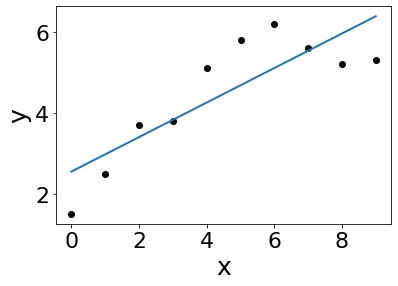

In [17]:
# generate the list of predictions
y_vals = X_vals_new@w_star
# plot the model
fig, ax = plt.subplots()
ax.scatter(X, y, c='black')
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.plot(X_vals, y_vals, linewidth=2)
plt.show()

### Gradient descent
#### Contour plot of the cost function

In [18]:
# Calculating the gradient
# create an array of linearly separated values around w_0
w0_vals = np.linspace(w_star[0]-3, w_star[0]+3, 100) 
# create an array of linearly separated values ae
w1_vals = np.linspace(w_star[1]-1, w_star[1]+1, 100) 
# create a grid of values to evaluate the cost function
w0_grid, w1_grid = np.meshgrid(w0_vals, w1_vals)
# compute the cost function at each combination of w0 and w1
Q_grid = np.zeros((100, 100))
for i in range(Q_grid.shape[0]):
    for j in range(Q_grid.shape[1]):
        Q_grid[i, j] = ((y - w0_grid[i, j] - w1_grid[i, j]*X)**2).sum()
# intercept gradient
w0_grad = -2*(y - w[1]*X - w[0]).sum()
# slope gradient
w1_grad = -2*(X*(y - w[1]*X - w[0])).sum()

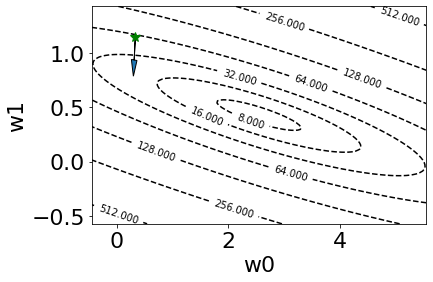

In [19]:
# plot the cost function as a contour plot
f, ax = plt.subplots()
cp = ax.contour(w0_grid, w1_grid, Q_grid, colors='black', linestyles='dashed',
                levels=[0, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
ax.plot(w[0], w[1], 'g*', markersize=10)
ax.arrow(w[0][0], w[1][0], -w0_grad*0.001, -w1_grad*0.001, head_width=0.1)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.xlabel('w0')
plt.ylabel('w1')
plt.show()

#### Iteratively update the weights

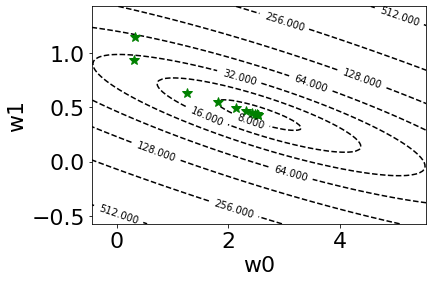

In [20]:
# maximum iterations for gradient descent update
max_iters = 1000
# learning rate or step size per update
learning_rate = 0.001
# plot the cost function as a contour plot
f, ax = plt.subplots()
cp = ax.contour(w0_grid, w1_grid, Q_grid, colors='black', linestyles='dashed',
                levels=[0, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
ax.plot(w[0], w[1], 'g*', markersize=10)
plt.clabel(cp, inline=True, 
          fontsize=10)
for i in range(max_iters): 
      # compute the gradients
      w0_grad = -2*(y- w[1]*X - w[0]).sum()
      w1_grad = -2*(X*(y - w[1]*X - w[0])).sum()
      # update the parameters
      w[0] = w[0] - learning_rate*w0_grad
      w[1] = w[1] - learning_rate*w1_grad
      # plot the current parameters at every 100th iteration
      if i % 100 == 0:
          ax.plot(w[0], w[1], 'g*', markersize=10)
plt.xlabel('w0')
plt.ylabel('w1')
plt.show()

## Stochastic gradient descent

In [21]:
# choose a random example
index = np.random.randint(X.shape[0]-1)
# compute the gradients
w0_grad = -2*(y[index]- w[1]*X[index] - w[0])
w1_grad = -2*(X[index]*(y[index] - w[1]*X[index] - w[0]))
# update the parameters
w[0] = w[0] - learning_rate*w0_grad
w[1] = w[1] - learning_rate*w1_grad

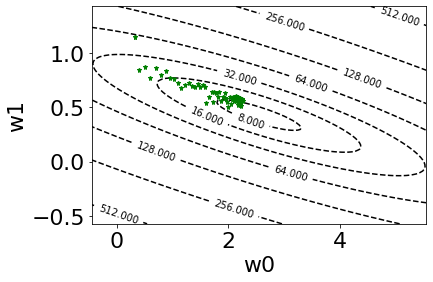

In [22]:
# reset to original weights
w = w_original
# maximum iterations for gradient descent update
max_iters = 6000
# learning rate or step size per update
learning_rate = 0.001
# plot the cost function as a contour plot
f, ax = plt.subplots()
cp = ax.contour(w0_grid, w1_grid, Q_grid, colors='black', linestyles='dashed',
                levels=[0, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
ax.plot(w[0], w[1], 'g*', markersize=5)
plt.clabel(cp, inline=True, 
          fontsize=10)
for i in range(max_iters): 
      # choose a random index of example
      index = np.random.randint(X.shape[0]-1)
      # compute the gradients
      w0_grad = -2*(y[index]- w[1]*X[index] - w[0])
      w1_grad = -2*(X[index]*(y[index] - w[1]*X[index] - w[0]))
      # update the parameters
      w[0] = w[0] - learning_rate*w0_grad
      w[1] = w[1] - learning_rate*w1_grad
      # plot the current parameters at every 100th iteration
      if i % 100 == 0:
          ax.plot(w[0], w[1], 'g*', markersize=5)
plt.xlabel('w0')
plt.ylabel('w1')
plt.show()

In [23]:
w_original

array([[2.25022712],
       [0.59840546]])

### Add basis function

In [24]:
# expand the original design matrix by adding polynomials
X_poly = np.hstack([np.ones((X.shape[0], 1)), X, X**2])
# solve for the optimal weight vector
w_star = np.linalg.solve(X_poly.T@X_poly, X_poly.T@y)
# generate model prediction
f_star = X_poly@w_star
# calculate the residuals
resid = y - f_star
# cost with the optimal weight 
Q = np.dot(resid.T, resid)
Q

array([[0.93895455]])

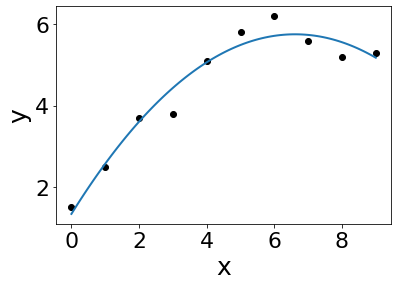

In [25]:
# create a list of equally spaced inputs on the x axis
X_vals = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
X_vals_poly = np.hstack([np.ones((X_vals.shape[0], 1)), X_vals, X_vals**2])
# generate the list of predictions
y_vals = X_vals_poly@w_star
# plot the model
fig, ax = plt.subplots()
ax.scatter(X, y, c='black')
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.plot(X_vals, y_vals, linewidth=2)
plt.show()

## Add more polynomials

In [26]:
# Generate the new design matrix 
def polynomial(x, num_basis=2):
    # Create the matrix of zeros as placeholder
    Phi = np.zeros((x.shape[0], num_basis))
    # Fill in each column based on the sequence of polynomials
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi

### 5th polynomial

In [27]:
num_basis = 6
# expand the original design matrix by adding polynomials
X_poly = polynomial(X, num_basis=num_basis)
# solve for the optimal weight vector
w_star = np.linalg.solve(X_poly.T@X_poly, X_poly.T@y)
# generate model prediction
f_star = X_poly@w_star
# calculate the residuals
resid = y - f_star
# cost with the optimal weight 
Q = np.dot(resid.T, resid)
Q

array([[0.30251748]])

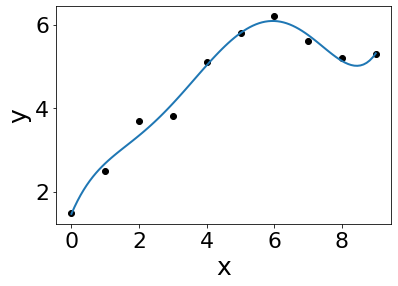

In [28]:
# create a list of equally spaced inputs on the x axis
X_vals = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
X_vals_poly = polynomial(X_vals, num_basis=num_basis)
# generate the list of predictions
y_vals = X_vals_poly@w_star
# plot the model
fig, ax = plt.subplots()
ax.scatter(X, y, c='black')
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.plot(X_vals, y_vals, linewidth=2)
plt.show()

### 10th polynomial

In [29]:
num_basis = 11
# expand the original design matrix by adding polynomials
X_poly = polynomial(X, num_basis=num_basis)
# solve for the optimal weight vector
w_star = np.linalg.solve(X_poly.T@X_poly, X_poly.T@y)
# generate model prediction
f_star = X_poly@w_star
# calculate the residuals
resid = y - f_star
# cost with the optimal weight 
Q = np.dot(resid.T, resid)
Q

array([[1.66556086e-09]])

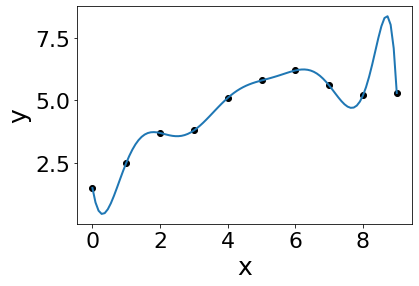

In [30]:
# create a list of equally spaced inputs on the x axis
X_vals = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
X_vals_poly = polynomial(X_vals, num_basis=num_basis)
# generate the list of predictions
y_vals = X_vals_poly@w_star
# plot the model
fig, ax = plt.subplots()
ax.scatter(X, y, c='black')
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.plot(X_vals, y_vals, linewidth=2)
plt.show()

### 15th polynomial

In [31]:
num_basis = 16
# expand the original design matrix by adding polynomials
X_poly = polynomial(X, num_basis=num_basis)
# solve for the optimal weight vector
w_star = np.linalg.solve(X_poly.T@X_poly, X_poly.T@y)
# generate model prediction
f_star = X_poly@w_star
# calculate the residuals
resid = y - f_star
# cost with the optimal weight 
Q = np.dot(resid.T, resid)
Q

array([[3.02059306e-12]])

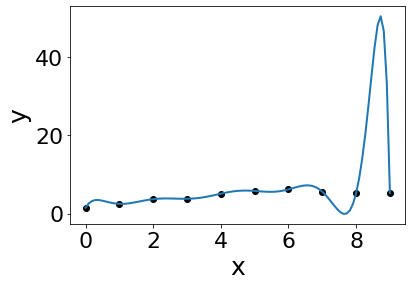

In [32]:
# create a list of equally spaced inputs on the x axis
X_vals = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
X_vals_poly = polynomial(X_vals, num_basis=num_basis)
# generate the list of predictions
y_vals = X_vals_poly@w_star
# plot the model
fig, ax = plt.subplots()
ax.scatter(X, y, c='black')
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.plot(X_vals, y_vals, linewidth=2)
plt.show()